# IS 362 Week 8 Assignment

Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables.
Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG.
1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
2. Review the data and the provided data set description.
3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.
5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
6. Create a bar chart that shows the distribution for cylinders.
7. Create a scatterplot that shows the relationship between horsepower and weight.
8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

I will begin by importing the modules neccessary to complate the tasks in the assignment.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

Now we can load the data directly from the UC Irvine repository.

In [23]:
autompg = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']).set_index('Car Name')
autompg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
Car Name,,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1


There are many variables that are vague or missing so this next bit of code will clean. I will use the replace() module to try to clean up those parts.

In [24]:
autompg = autompg.replace(to_replace='?', value=np.nan)
autompg['Origin'].replace(1, 'USA', inplace=True)
autompg['Origin'].replace(2, 'Asia', inplace=True)
autompg['Origin'].replace(3, 'Europe', inplace=True)
autompg['Horsepower'].astype(float)
autompg['Weight'].astype(float)
autompg['MPG'].astype(float)
autompg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
Car Name,,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,USA
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,USA
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,USA
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,USA
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,USA


That cleans the data up a bit and makes it easier to identify and present.

Next step we can start working on some of the visual aspects of the assignement.

I will create a bar chart that will display the cylinder data distribution.

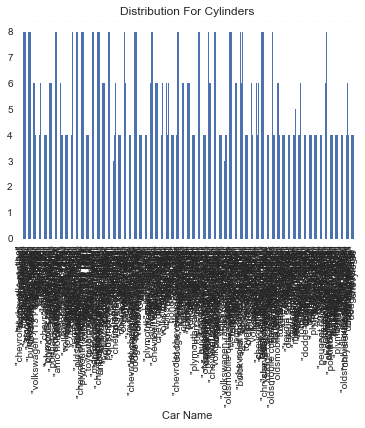

In [25]:
autompg.groupby('Cylinders')
autompg['Cylinders'].plot(kind='bar', title='Distribution For Cylinders')

Now I can move on to creating a scatterplot that will display the relationship between horsepower and weight of the vehicles in the data set.

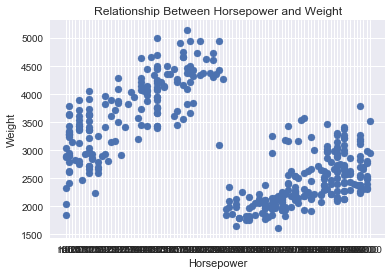

In [26]:
plt.scatter(autompg['Horsepower'], autompg['Weight'])
plt.title('Relationship Between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

My next scatterplaot will focus on the relationship between horsepower and miles per gallon (MPG) from the data set.

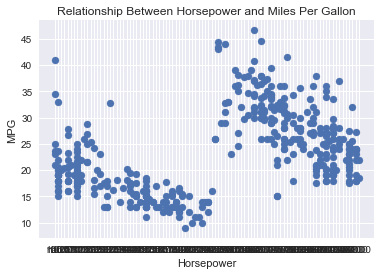

In [27]:
plt.scatter(autompg['Horsepower'], autompg['MPG'])
plt.title('Relationship Between Horsepower and Miles Per Gallon')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

Lastly, we can see how the car models are disbursed thoughout the years.

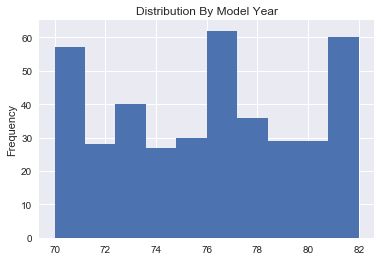

In [28]:
autompg.groupby('Model Year')
autompg['Model Year'].plot(kind='hist', title='Distribution By Model Year')